## Importing libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

### Loading the data and having an overview

In [2]:
df1 = pd.read_csv("train.csv", header = 0)

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1.set_index(pd.Index([a for a in range(1, len(df1) + 1)]), inplace = True)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Treating null values

In [5]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1["Age"] = df1["Age"].fillna(method = "ffill")

In [7]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df1["Cabin"] = df1["Cabin"].fillna(method = "ffill")

In [9]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

In [10]:
df1["Cabin"] = df1["Cabin"].fillna(method = "backfill")

In [11]:
df1["Embarked"] = df1["Embarked"].fillna(method = "ffill")

In [12]:
df1["Cabin"].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [13]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Showing a little insights on the data with the aid of visualization

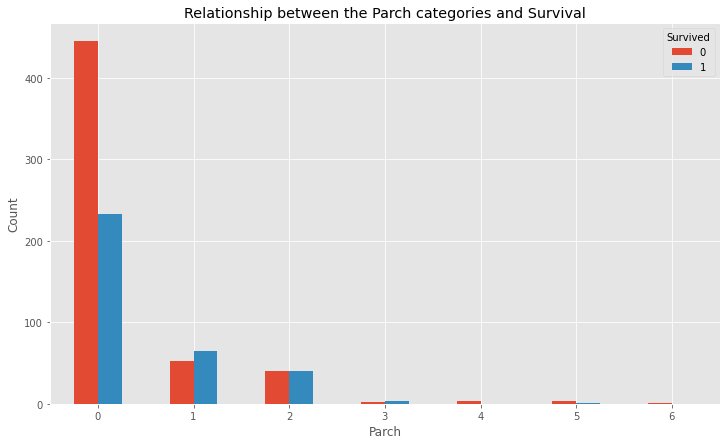

In [17]:
pd.crosstab(df1.Parch, df1.Survived).plot(kind = "bar", rot = 0, figsize = [12, 7])

plt.title("Relationship between the Parch categories and Survival")
plt.ylabel("Count")
plt.show()

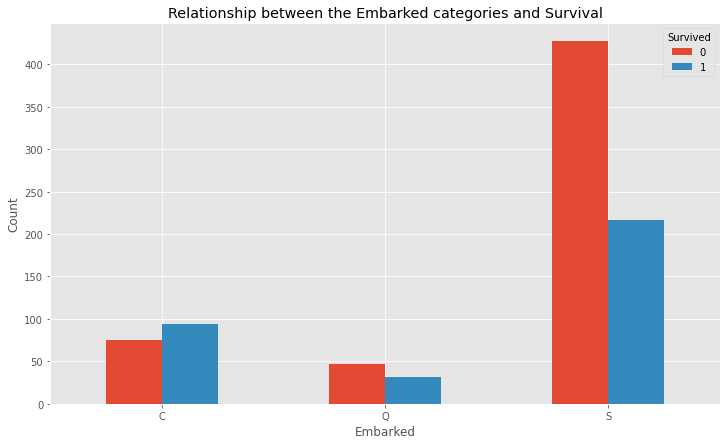

In [18]:
pd.crosstab(df1.Embarked, df1.Survived).plot(kind = "bar", rot = 0, figsize = [12, 7])

plt.title("Relationship between the Embarked categories and Survival")
plt.ylabel("Count")
plt.show()

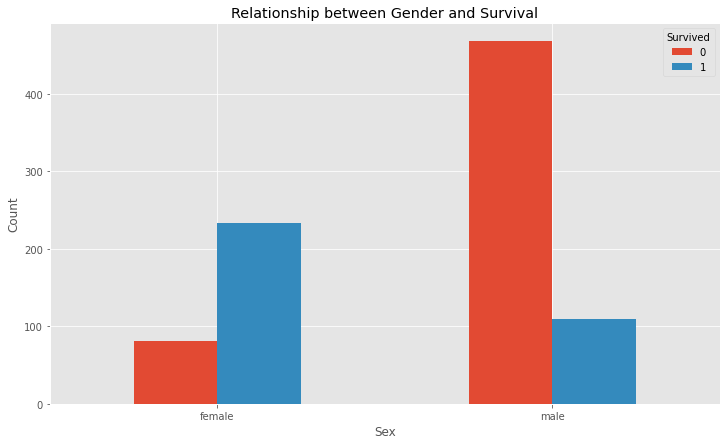

The Females had a higher survival rate


In [19]:
pd.crosstab(df1.Sex, df1.Survived).plot(kind = "bar", rot = 0, figsize = [12, 7])

plt.title("Relationship between Gender and Survival")
plt.ylabel("Count")
plt.show()
print("The Females had a higher survival rate")

### Setting aside the predictor and target features

In [20]:
col_list = df1.columns.values.tolist()
col_list.remove("Survived")
col_list.remove("Name")
col_list.remove("Ticket")
col_list.remove("PassengerId")
col_list.remove("Fare")
col_list.remove("Cabin")
X = df1[col_list]
Y = df1["Survived"]

In [21]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
1,3,male,22.0,1,0,S
2,1,female,38.0,1,0,C
3,3,female,26.0,0,0,S
4,1,female,35.0,1,0,S
5,3,male,35.0,0,0,S


#### Using column transformers as opposed to pandas dummies

In [22]:
transformed_col = make_column_transformer((OneHotEncoder(), ["Sex", "Embarked"]), 
                                          (StandardScaler(), ["Age"]),
                                          remainder = "passthrough")

In [23]:
transformed_col.fit_transform(X)

array([[0., 1., 0., ..., 3., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 3., 0., 0.],
       ...,
       [1., 0., 0., ..., 3., 1., 2.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 3., 0., 0.]])

### loading and cleaning the test dataset

In [24]:
df_test = pd.read_csv("test.csv")
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [25]:
df_test.set_index(pd.Index([a for a in range(1, len(df_test) + 1)]), inplace = True)
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [26]:
df_test = df_test.drop(labels = ["PassengerId", "Name", "Ticket", "Cabin", "Fare"], axis = "columns")

In [27]:
df_y = pd.read_csv("gender_submission.csv")
df_y = df_y.drop(labels = "PassengerId", axis = "columns")
df_y.shape

(418, 1)

In [28]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [29]:
df_test["Age"] = df_test["Age"].fillna(method = "ffill")

In [30]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [31]:
df_test.dropna(how = "any", axis = "rows", inplace = True)

In [32]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

#### training the logistic regression model

In [33]:
logreg = LogisticRegression()

In [34]:
pipe = make_pipeline(transformed_col, logreg)
pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age'])])),
                ('logisticregression', LogisticRegression())])

#### training the decision tree model

In [35]:
dt = DecisionTreeClassifier()

In [36]:
pipe2 = make_pipeline(transformed_col, dt)
pipe2.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

#### training the svm model

In [38]:
svm_model = SVC()

In [39]:
pipe3 = make_pipeline(transformed_col, svm_model)
pipe3.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age'])])),
                ('svc', SVC())])

#### training the random forest model

In [40]:
random_forest_model = RandomForestClassifier()

In [41]:
pipe4 = make_pipeline(transformed_col, random_forest_model)
pipe4.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age'])])),
                ('randomforestclassifier', RandomForestClassifier())])

## GRID SEARCH CV FOR HYPER PARAMETER TUNING

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
models_and_parameters = {
    "logistic_regression":{
        "model" : pipe,
        "params" : {
            "logisticregression__C" : [1, 3, 5, 10],
            "logisticregression__solver" : ["liblinear", "lbfgs"]
        }
    },
    
    "decision_tree_classifier":{
        "model" : pipe2,
        "params" :{
            "decisiontreeclassifier__criterion" : ["gini", "entropy"],
            "decisiontreeclassifier__min_samples_split" : [10, 20, 40, 50, 60, 70],
            "decisiontreeclassifier__min_samples_leaf" : [1, 2, 5, 8, 10]
        }
    },
    
    "svm":{
        "model" : pipe3,
        "params" :{
            "svc__C" : [1, 2, 5, 7, 10],
            "svc__kernel" : ["linear", "rbf"],
            "svc__gamma" : ["scale", "auto"]
        }
    },
    
    "random_forest_classifier" :{
        "model" : pipe4,
        "params" : {
            "randomforestclassifier__min_samples_split" : [10, 20, 40, 50, 70, 100],
            "randomforestclassifier__min_samples_leaf" : [1, 2, 5, 7],
            "randomforestclassifier__n_estimators" : [50, 80, 100, 120, 150],
            "randomforestclassifier__criterion" : ["gini", "entropy"]
        }
    }
}

In [44]:
gsc_summary = []

for model_name, model_params in models_and_parameters.items():
    gsc_multiple = GridSearchCV(model_params["model"], model_params["params"], cv = 10, return_train_score = False)
    gsc_multiple.fit(X, Y)
    gsc_summary.append({
        "model_name" : model_name,
        "best_parameters" : gsc_multiple.best_params_,
        "best_score" : gsc_multiple.best_score_
    })
    

In [45]:
pd.reset_option("display.max_colwidth")
df_gsc_summary = pd.DataFrame(gsc_summary)
df_gsc_summary

,model_name,best_parameters,best_score
0,logistic_regression,"{'logisticregression__C': 1, 'logisticregressi...",0.794632
1,decision_tree_classifier,"{'decisiontreeclassifier__criterion': 'gini', ...",0.819426
2,svm,"{'svc__C': 10, 'svc__gamma': 'auto', 'svc__ker...",0.829413
3,random_forest_classifier,{'randomforestclassifier__criterion': 'entropy...,0.823795


In [46]:
pd.set_option("display.max_colwidth", None)
df_gsc_summary

,model_name,best_parameters,best_score
0,logistic_regression,"{'logisticregression__C': 1, 'logisticregression__solver': 'lbfgs'}",0.794632
1,decision_tree_classifier,"{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__min_samples_split': 20}",0.819426
2,svm,"{'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}",0.829413
3,random_forest_classifier,"{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__min_samples_leaf': 7, 'randomforestclassifier__min_samples_split': 20, 'randomforestclassifier__n_estimators': 80}",0.823795


# COMPARING THE ACCURACY ON THE TEST DATA

### FOR RANDOM FOREST

In [47]:
predicted_results4 = pipe4.predict(df_test)

In [49]:
data_containing_actual_outcomes = pd.read_csv("gender_submission.csv")
actual_y = data_containing_actual_outcomes["Survived"]

In [50]:
pd.crosstab(actual_y, predicted_results4, rownames = ["Actual"], colnames = ["Predicted"])

Predicted,0,1
Actual,,
0,222,44
1,32,120


In [51]:
pipe4.score(df_test, actual_y)

0.8181818181818182

### FOR SVM

In [52]:
predicted_results3 = pipe3.predict(df_test)

In [53]:
pd.crosstab(actual_y, predicted_results3, rownames = ["Actual"], colnames = ["Predicted"])

Predicted,0,1
Actual,,
0,256,10
1,10,142


In [54]:
pipe3.score(df_test, actual_y)

0.9521531100478469

### FOR DECISION TREE CLASSIFIER

In [55]:
predicted_results2 = pipe2.predict(df_test)

In [56]:
pd.crosstab(actual_y, predicted_results2, rownames = ["Actual"], colnames = ["Predicted"])

Predicted,0,1
Actual,,
0,219,47
1,37,115


In [57]:
pipe2.score(df_test, actual_y)

0.7990430622009569

### FOR LOGISTIC REGRESSION

In [58]:
predicted_results = pipe.predict(df_test)

In [59]:
pd.crosstab(actual_y, predicted_results, rownames = ["Actual"], colnames = ["Predicted"])

Predicted,0,1
Actual,,
0,250,16
1,10,142


In [60]:
pipe.score(df_test, actual_y)

0.937799043062201

### Conclusion

## The hyper parameter tuned SVM Model performs best with an average accurracy of 89.08%